In [103]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split , KFold , GridSearchCV
from fast_ml.model_development import train_valid_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import accuracy_score , precision_recall_curve
from sklearn.metrics import classification_report , recall_score , precision_score
from sklearn.metrics import precision_recall_curve , average_precision_score
from sklearn.metrics import confusion_matrix , f1_score
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import plot_tree


In [68]:
# loading data to Pandas Dataframe
heart_data = pd.read_csv("heart.csv")

In [69]:
#print first 5 rows
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [70]:
#print last 5 rows
heart_data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [71]:
# Describe the data
heart_data.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.5,9.4,28.0,47.0,54.0,60.0,77.0
RestingBP,918.0,132.4,18.5,0.0,120.0,130.0,140.0,200.0
Cholesterol,918.0,198.8,109.4,0.0,173.2,223.0,267.0,603.0
FastingBS,918.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
MaxHR,918.0,136.8,25.5,60.0,120.0,138.0,156.0,202.0
Oldpeak,918.0,0.9,1.1,-2.6,0.0,0.6,1.5,6.2
HeartDisease,918.0,0.6,0.5,0.0,0.0,1.0,1.0,1.0


In [72]:
missing_values = heart_data.isnull().sum() 
print("Missing values in each column:\n", missing_values) 

Missing values in each column:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


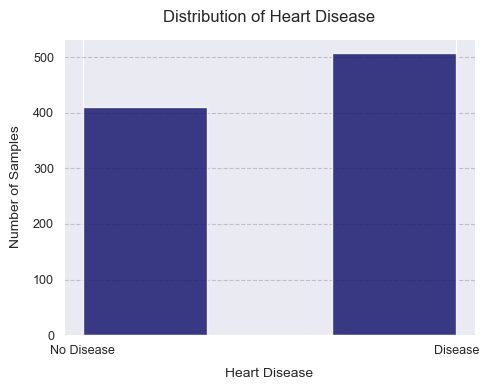

In [73]:
plt.figure(figsize=(5, 4)) 
plt.hist(heart_data['HeartDisease'], bins=3, color='midnightblue', edgecolor='white', alpha=0.85)

# Labels 
plt.xlabel('Heart Disease', fontsize=10, labelpad=8)
plt.ylabel('Number of Samples', fontsize=10, labelpad=8)
plt.title('Distribution of Heart Disease', fontsize=12, pad=12)

# ticks and gridlines
plt.xticks([0, 1], labels=['No Disease', 'Disease'], fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.4)  # Subtle, elegant gridlines

# Reduce whitespace
plt.tight_layout()

plt.show()

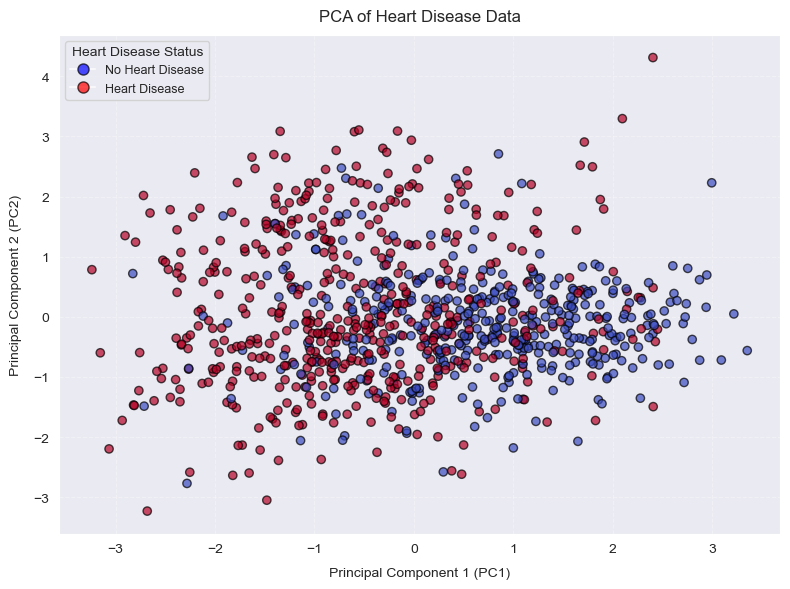

In [74]:
# Scaling features for PCA
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

scaler = StandardScaler() 
scaled_data = scaler.fit_transform(heart_data[numerical_features])

# PCA transformation
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(scaled_data) 
 
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2']) 
pca_df['HeartDisease'] = heart_data['HeartDisease']

# Plotting PCA results
plt.figure(figsize=(8, 6))  
scatter = plt.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    c=pca_df['HeartDisease'],
    cmap='coolwarm',  
    alpha=0.7,  
    edgecolor='k'
)

# Adding plot labels and title
plt.xlabel('Principal Component 1 (PC1)', fontsize=10, labelpad=8)
plt.ylabel('Principal Component 2 (PC2)', fontsize=10, labelpad=8)
plt.title('PCA of Heart Disease Data', fontsize=12, pad=10)

# Adding a legend for the color labels
handles = [plt.Line2D([0], [0], marker='o', color='w', label='No Heart Disease', 
                      markerfacecolor='blue', markersize=8, alpha=0.7, markeredgecolor='k'),
           plt.Line2D([0], [0], marker='o', color='w', label='Heart Disease', 
                      markerfacecolor='red', markersize=8, alpha=0.7, markeredgecolor='k')]

plt.legend(handles=handles, title='Heart Disease Status', loc='best', fontsize=9, title_fontsize=10)

# Final adjustments
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [75]:
# Preprocessing for Categorical data
le = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for column in categorical_columns:
    heart_data[column] = le.fit_transform(heart_data[column])
    # Display the transformed columns after label encoding
for column in categorical_columns:
    print(f"Column: {column}")
    print(heart_data[column].head(), "\n")  # Display the first few rows for each encoded column

Column: Sex
0    1
1    0
2    1
3    0
4    1
Name: Sex, dtype: int32 

Column: ChestPainType
0    1
1    2
2    1
3    0
4    2
Name: ChestPainType, dtype: int32 

Column: RestingECG
0    1
1    1
2    2
3    1
4    1
Name: RestingECG, dtype: int32 

Column: ExerciseAngina
0    0
1    0
2    0
3    1
4    0
Name: ExerciseAngina, dtype: int32 

Column: ST_Slope
0    2
1    1
2    2
3    1
4    2
Name: ST_Slope, dtype: int32 



Outliers in Age: 0
Outliers in RestingBP: 28
Outliers in Cholesterol: 183
Outliers in MaxHR: 2
Outliers in Oldpeak: 16


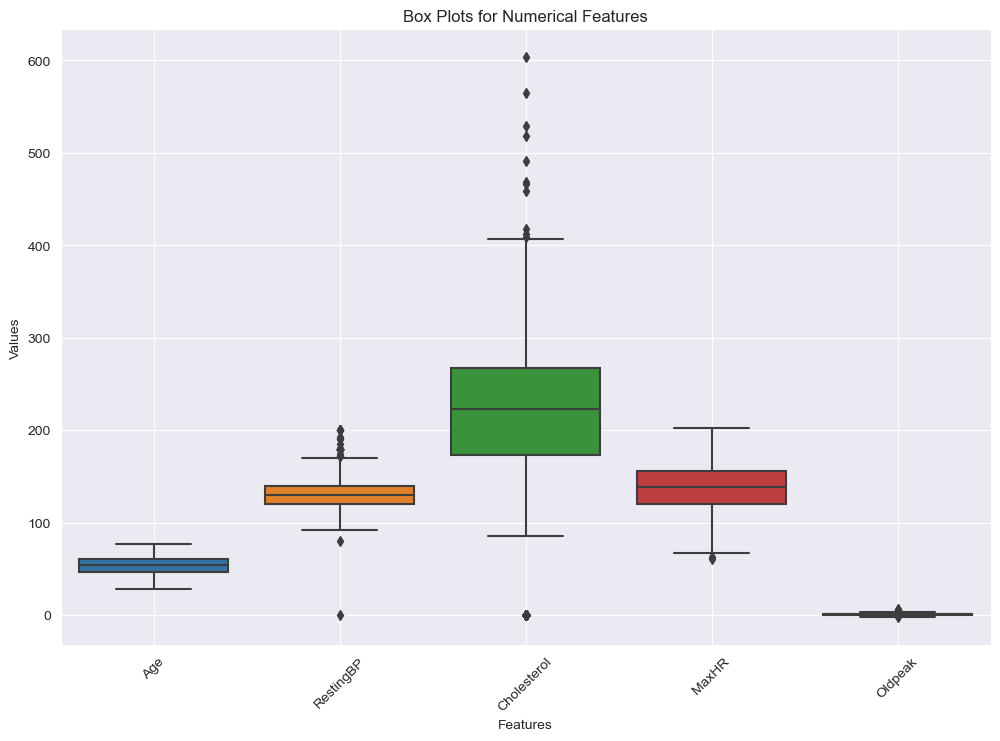

In [76]:
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
outliers = detect_outliers(heart_data, numerical_features)
for col, outlier_data in outliers.items():
    print(f"Outliers in {col}: {len(outlier_data)}")
    
# Set up the plotting style
plt.figure(figsize=(12, 8))

# Create box plots for the numerical features
sns.boxplot(data=heart_data[numerical_features])
plt.title('Box Plots for Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

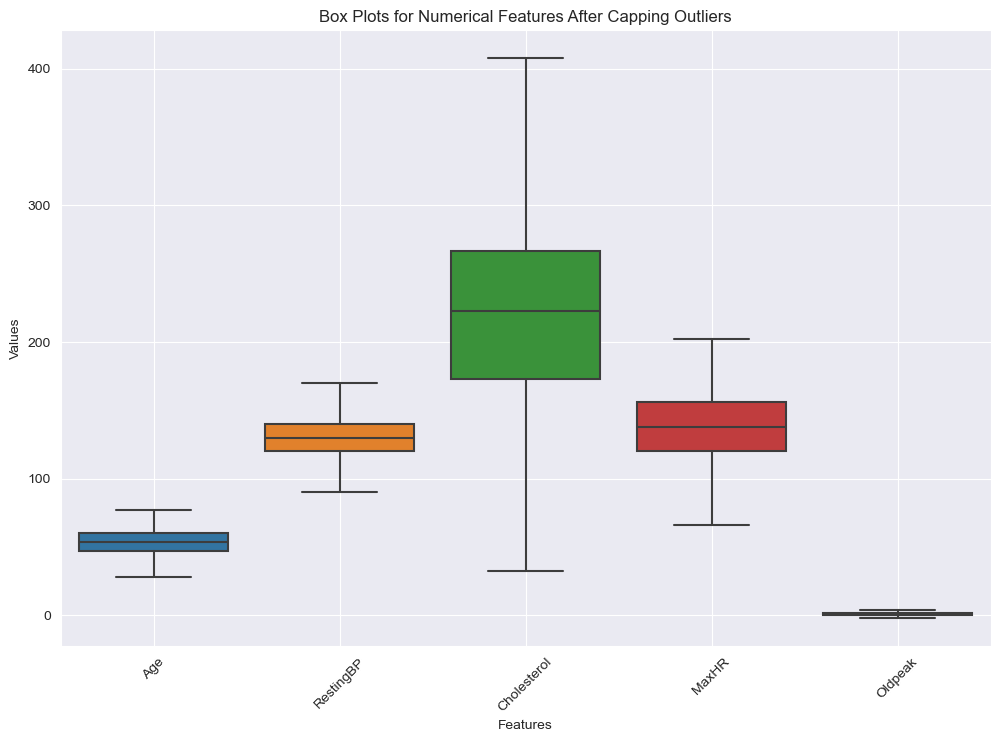

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.0,918.0,918.0,918.0,918.0,918.0,918.0,918.0,918.0,918.0,918.0,918.0
mean,53.5,0.8,0.8,132.1,204.0,0.2,1.0,136.8,0.4,0.9,1.4,0.6
std,9.4,0.4,1.0,17.0,95.9,0.4,0.6,25.4,0.5,1.0,0.6,0.5
min,28.0,0.0,0.0,90.0,32.6,0.0,0.0,66.0,0.0,-2.2,0.0,0.0
25%,47.0,1.0,0.0,120.0,173.2,0.0,1.0,120.0,0.0,0.0,1.0,0.0
50%,54.0,1.0,0.0,130.0,223.0,0.0,1.0,138.0,0.0,0.6,1.0,1.0
75%,60.0,1.0,2.0,140.0,267.0,0.0,1.0,156.0,1.0,1.5,2.0,1.0
max,77.0,1.0,3.0,170.0,407.6,1.0,2.0,202.0,1.0,3.8,2.0,1.0


In [77]:
# Cap the outliers at the upper and lower bounds
data_cleaned = heart_data.copy()

for col in numerical_features:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned[col] = data_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

# Show the first few rows after capping the outliers
data_cleaned.head()

# Visualize the clipped data
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_cleaned[numerical_features])
plt.title('Box Plots for Numerical Features After Capping Outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
data_cleaned.describe().round(1)

In [78]:
duplicates = heart_data.duplicated()
duplicate_count = duplicates.sum()
print(f"Number of duplicate rows: {duplicate_count}")
data_cleaned = data_cleaned.drop_duplicates()


Number of duplicate rows: 0


In [79]:

X = data_cleaned.drop(columns=['HeartDisease'])
y = data_cleaned['HeartDisease']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [80]:
# Scale dataset
sc = StandardScaler()
X_scaled=sc.fit_transform(X)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_valid = sc.transform(X_valid)

In [81]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

model = GaussianNB()
gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv= 4,
                     verbose=1, 
                     scoring='accuracy',
                    return_train_score =True)

gs_NB.fit(X_train, y_train);
print(gs_NB.best_params_)
print(gs_NB.best_score_)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
{'var_smoothing': 0.1}
0.8410811335403726


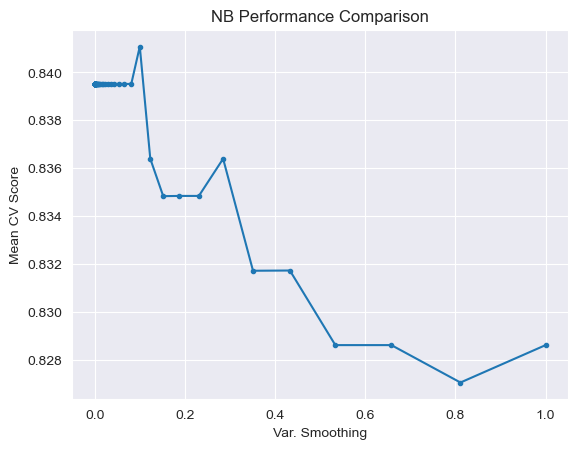

In [82]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
results_NB['train_score'] = gs_NB.cv_results_['mean_train_score']  # Training accuracy
results_NB['validation_score'] = gs_NB.cv_results_['mean_test_score']  # Validation accuracy

plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

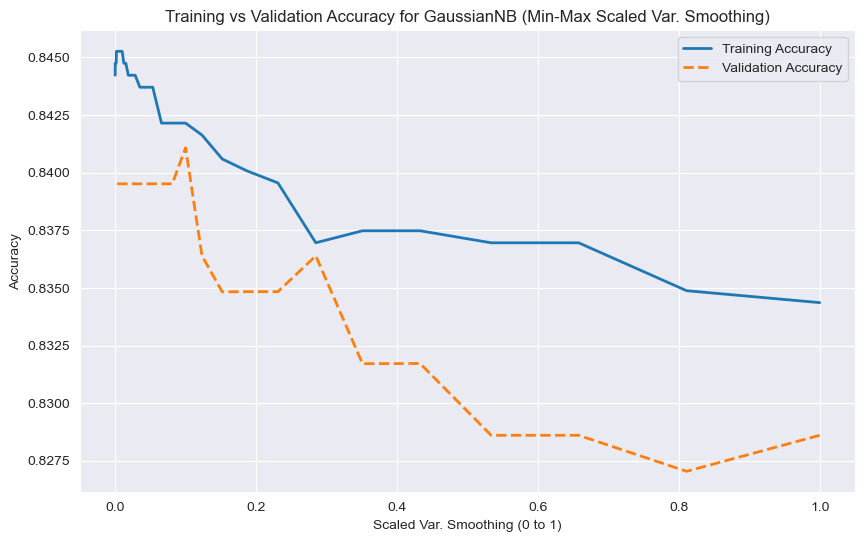

In [83]:
# Min-Max Scaling on var_smoothing to scale it to [0, 1]
scaler = MinMaxScaler()
scaled_var_smoothing = scaler.fit_transform(results_NB[['var_smoothing']]) 

# Plot Training vs Validation Accuracy with Min-Max scaling
plt.figure(figsize=(10, 6))
plt.plot(scaled_var_smoothing, results_NB['train_score'], label='Training Accuracy', linestyle='-', linewidth=2)
plt.plot(scaled_var_smoothing, results_NB['validation_score'], label='Validation Accuracy', linestyle='--', linewidth=2)
plt.xlabel('Scaled Var. Smoothing (0 to 1)')
plt.ylabel('Accuracy')
plt.title("Training vs Validation Accuracy for GaussianNB (Min-Max Scaled Var. Smoothing)")
plt.legend()
plt.grid(True)
plt.show()

In [84]:
predict_valid = gs_NB.predict(X_valid)
nb_valid_accuracy = accuracy_score(y_valid, predict_valid)
print(f"Validation Accuracy (Naive Bayes): {nb_valid_accuracy:.4f}")

predict_test = gs_NB.predict(X_test)
nb_recall = recall_score(y_test, predict_test, pos_label=1)
print(f"Naive Bayes Recall: {nb_recall:.4f}")

nb_precision = precision_score(y_test, predict_test, pos_label=1)
print(f"Naive Bayes Precision: {nb_precision:.4f}")

nb_f1 = f1_score(y_test, predict_test, average='weighted')
print(f"Naive Bayes F1 Score: {nb_f1:.4f}")

nb_accuracy = accuracy_score(y_test, predict_test)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, predict_test))


Validation Accuracy (Naive Bayes): 0.8696
Naive Bayes Recall: 0.8684
Naive Bayes Precision: 0.9041
Naive Bayes F1 Score: 0.8770
Naive Bayes Accuracy: 0.8768

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        62
           1       0.90      0.87      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138



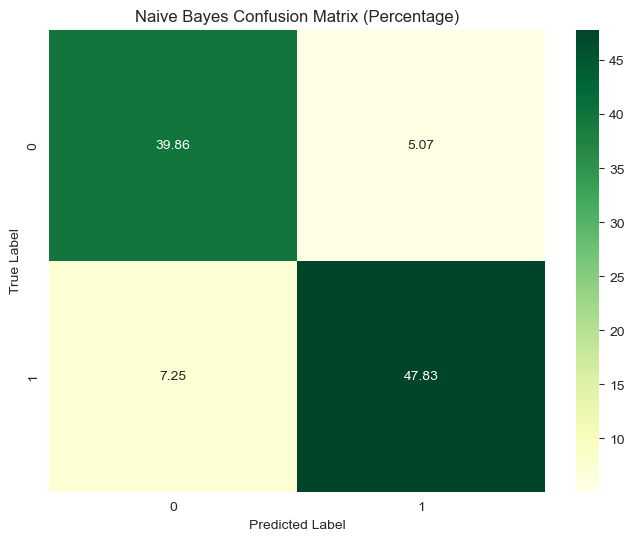

In [85]:
# Naive Bayes CONFUSION MATRIX

cm_bayes = confusion_matrix(y_test, predict_test)
cm_bayes_percentage = cm_bayes / cm_bayes.sum() * 100  # Normalizes by total samples for overall percentages

plt.figure(figsize=(8, 6))
sns.heatmap(cm_bayes_percentage, annot=True, fmt='.2f', cmap="YlGn", cbar=True)
plt.title('Naive Bayes Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [86]:
# Define a hyperparameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],          
    'kernel': ['linear', 'rbf'], 
    'gamma': ['scale', 'auto']  
}

svm = SVC(probability=True)
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True,verbose=1)

grid_search.fit(X_train, y_train)

# Best model and hyperparameters found by GridSearchCV
best_svm = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Extract the best training and validation scores
best_train_score = grid_search.cv_results_['mean_train_score'][grid_search.best_index_]
best_val_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Validation Score: {best_val_score:.2f}")
print(f"Best Training Score from GridSearchCV: {best_train_score:.2f}")



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Validation Score: 0.85
Best Training Score from GridSearchCV: 0.90


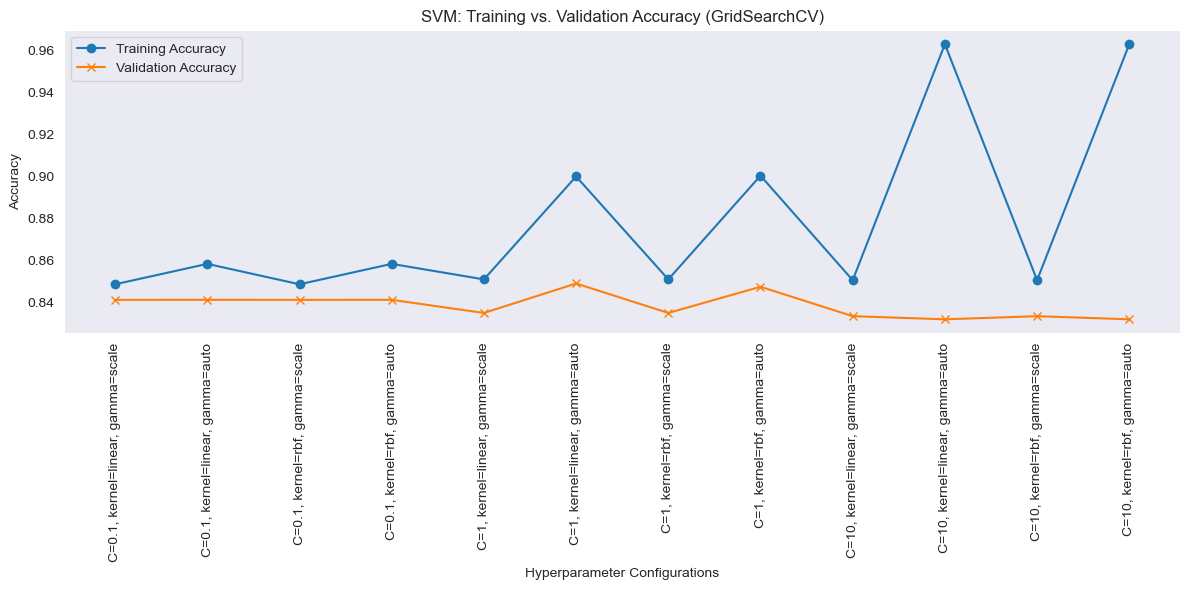

In [87]:

# Retrieve the grid search results for plotting
results = grid_search.cv_results_
mean_train_scores = results['mean_train_score']
mean_val_scores = results['mean_test_score']
config_labels = [f"C={C}, kernel={kernel}, gamma={gamma}" 
                 for C in param_grid['C']
                 for kernel in param_grid['kernel']
                 for gamma in param_grid['gamma']]

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(len(mean_train_scores)), mean_train_scores, label='Training Accuracy', marker='o')
plt.plot(range(len(mean_val_scores)), mean_val_scores, label='Validation Accuracy', marker='x')
plt.xticks(range(len(config_labels)), config_labels, rotation=90)
plt.title('SVM: Training vs. Validation Accuracy (GridSearchCV)')
plt.xlabel('Hyperparameter Configurations')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

In [88]:

# Validate on the validation set
y_valid_pred_svm = best_svm.predict(X_valid)
valid_accuracy_svm = accuracy_score(y_valid, y_valid_pred_svm)
print(f"\033[1mValidation Accuracy (SVM):\033[0m {valid_accuracy_svm:.2f}")

# Predictions and metrics for the test set
y_test_pred_svm = best_svm.predict(X_test)

svm_recall = recall_score(y_test, y_test_pred_svm, pos_label=1)
svm_precision = precision_score(y_test, y_test_pred_svm, pos_label=1)
svm_accuracy = accuracy_score(y_test, y_test_pred_svm)
svm_f1 = f1_score(y_test, y_test_pred_svm, average='weighted')

print(f"\033[1mTest Accuracy:\033[0m {svm_accuracy:.2f}")
print(f"\033[1mPrecision:\033[0m {svm_precision:.2f}")
print(f"\033[1mRecall:\033[0m {svm_recall:.2f}")
print(f"\033[1mF1-Score:\033[0m {svm_f1:.2f}")

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_svm))



Validation Accuracy (SVM): 0.91
Test Accuracy: 0.88
Precision: 0.89
Recall: 0.88
F1-Score: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        62
           1       0.89      0.88      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138



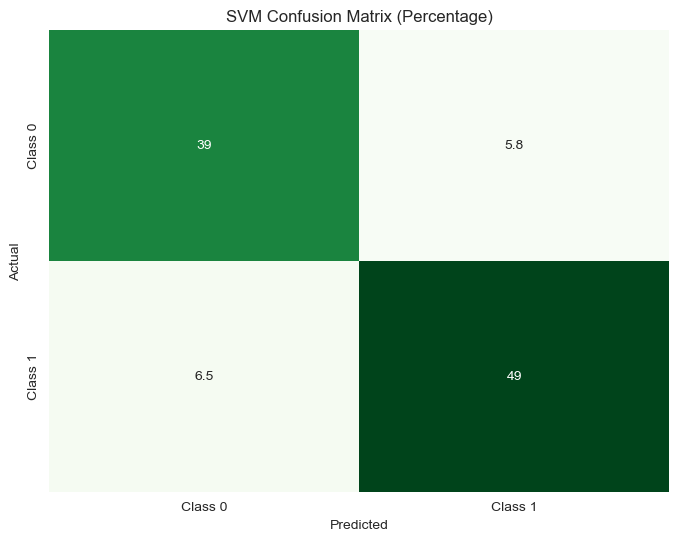

In [89]:
# SVM CONFUSION MATRIX
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
conf_matrix_svm_percentage = conf_matrix_svm.astype('int') / conf_matrix_svm.sum() * 100

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_percentage, annot=True, cmap="Greens", cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

plt.title('SVM Confusion Matrix (Percentage)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()


In [90]:
# Decision Tree model

model = DecisionTreeClassifier(random_state=42)

param_grid = {
 'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 15, 20],
    'min_samples_leaf': [2, 5, 15, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f'Best Parameters: {best_params}')

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 15, 'min_samples_split': 2}


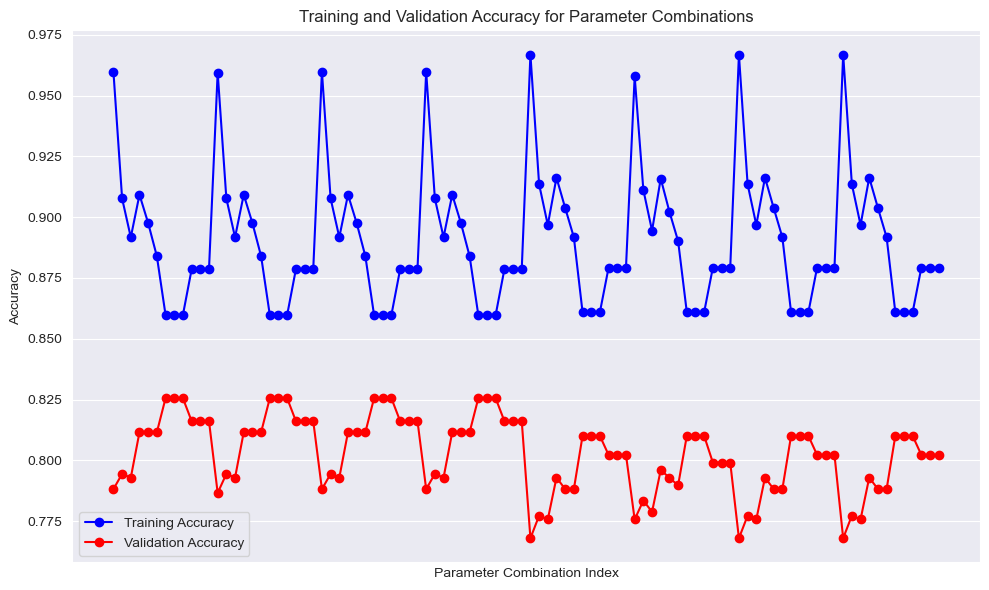

In [91]:
# plotting DT

results = pd.DataFrame(grid_search.cv_results_)

# Extract the relevant columns
train_scores = results['mean_train_score']
val_scores = results['mean_test_score']

# Identify the best hyperparameters
best_index = results['mean_test_score'].idxmax()
best_params = results['params'][best_index]
best_val_score = val_scores[best_index]
best_train_score = train_scores[best_index]


plt.figure(figsize=(10, 6))
plt.plot(train_scores, label="Training Accuracy", marker='o', linestyle='-', color='blue')
plt.plot(val_scores, label="Validation Accuracy", marker='o', linestyle='-', color='red')

plt.xticks([])  

plt.title('Training and Validation Accuracy for Parameter Combinations')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [92]:

# Train the best model
best_model.fit(X_train, y_train)

y_pred_valid = best_model.predict(X_valid)
y_pred_test = best_model.predict(X_test)

DT_valid_accuracy = accuracy_score(y_valid, y_pred_valid)
print(f"\033[1mValidation Accuracy:\033[0m {DT_valid_accuracy:.2f}")

# Evaluation metrics for the test set
DT_accuracy = accuracy_score(y_test, y_pred_test)
DT_precision = precision_score(y_test, y_pred_test, average='weighted')
DT_recall = recall_score(y_test, y_pred_test, average='weighted')
DT_f1 = f1_score(y_test, y_pred_test, average='weighted')

print(f"\033[1mTest Accuracy:\033[0m {DT_accuracy:.2f}")
print(f"\033[1mPrecision:\033[0m {DT_precision:.2f}")
print(f"\033[1mRecall:\033[0m {DT_recall:.2f}")
print(f"\033[1mF1-Score:\033[0m {DT_f1:.2f}")

# Classification report
print("\n\033[1mClassification Report:\033[0m")
print(classification_report(y_test, y_pred_test))



Validation Accuracy: 0.87
Test Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1-Score: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        62
           1       0.89      0.83      0.86        76

    accuracy                           0.85       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.85      0.85      0.85       138



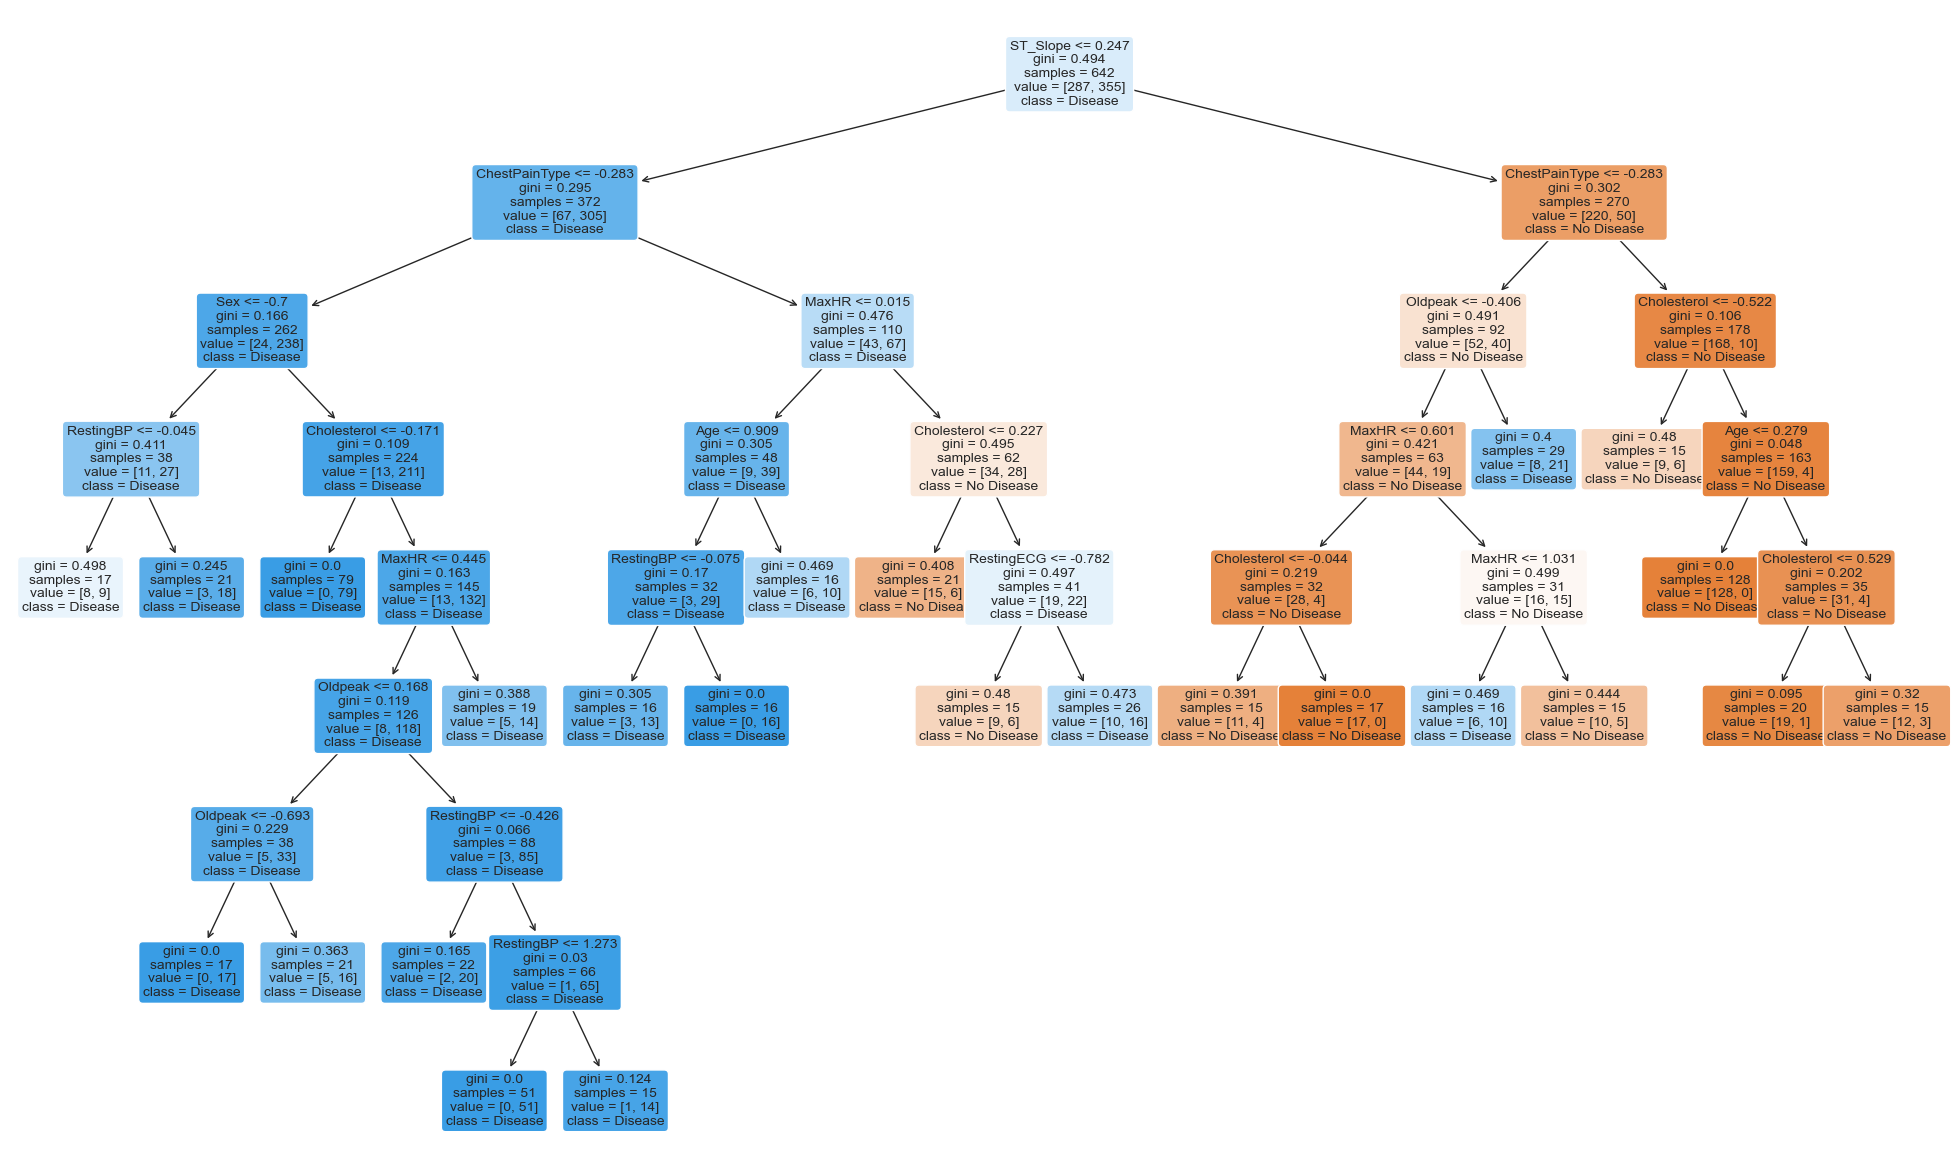

In [93]:
# Convert feature names to a list
feature_names = X.columns.tolist()

# Create a figure with a larger size
plt.figure(figsize=(25, 15))

# Plot the decision tree with customization
plot_tree(
    best_model, 
    filled=True,  # Keep the color fill
    feature_names=feature_names,  # Feature names for clarity
    class_names=['No Disease', 'Disease'],  # Class labels for target variable
    fontsize=10,  # Increase font size for better readability
    proportion=False,  # If you want to display class proportions
    rounded=True
)

# Show the plot
plt.show()


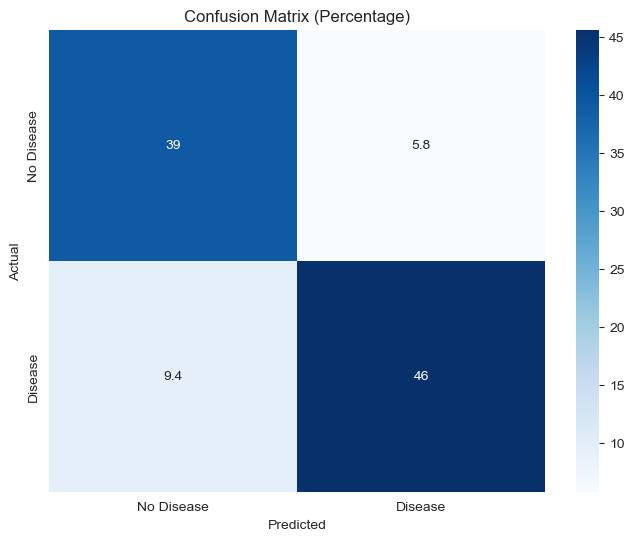

In [94]:

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Normalize confusion matrix to percentages
conf_matrix_percentage = conf_matrix.astype('int') / conf_matrix.sum() * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_percentage,
    annot=True,  # Format as percentage with 2 decimal places
    cmap='Blues',
    xticklabels=['No Disease', 'Disease'],
    yticklabels=['No Disease', 'Disease']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentage)')
plt.show()

# KNN

In [95]:
param_grid_knn = {
    'n_neighbors': range(1,30),
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', return_train_score=True )
grid_knn.fit(X_train, y_train)

print("KNN best params:", grid_knn.best_params_)
print("KNN best validation accuracy:", grid_knn.best_score_)


KNN best params: {'n_neighbors': 19, 'weights': 'distance'}
KNN best validation accuracy: 0.8473352713178294


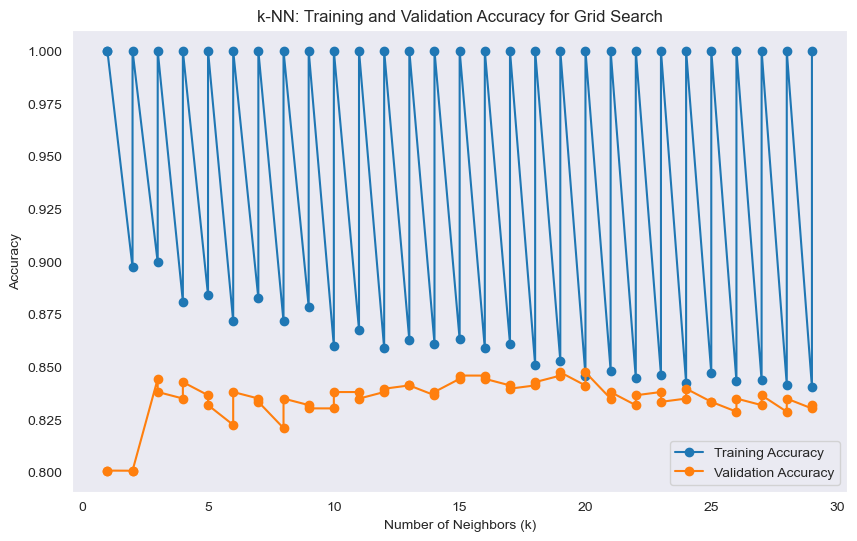

In [96]:
# Extract results from GridSearchCV
results = grid_knn.cv_results_

# Extract the mean training and validation scores
mean_train_scores = results['mean_train_score']
mean_valid_scores = results['mean_test_score']

# Get the values of n_neighbors used during the search
neighbors = [param['n_neighbors'] for param in results['params']]

# Plot the training and validation scores
plt.figure(figsize=(10, 6))
plt.title('k-NN: Training and Validation Accuracy for Grid Search')
plt.plot(neighbors, mean_train_scores, label='Training Accuracy', marker='o')
plt.plot(neighbors, mean_valid_scores, label='Validation Accuracy', marker='o')
plt.legend()
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In [97]:
# Train the KNN model with the best hyperparameters

best_knn = KNeighborsClassifier(**grid_knn.best_params_)
best_knn.fit(X_train, y_train)

# Make predictions on the validation set
pred_valid = best_knn.predict(X_valid)
KNN_valid_accuracy = accuracy_score(y_valid, pred_valid)
print(f"\033[1mValidation Accuracy:\033[0m {KNN_valid_accuracy:.2f}")

# Make predictions on the test set
pred_test = best_knn.predict(X_test)

# Calculate metrics using predictions on the test set
KNN_accuracy = accuracy_score(y_test, pred_test)
KNN_precision = precision_score(y_test, pred_test, average='weighted')
KNN_recall = recall_score(y_test, pred_test, average='weighted')
KNN_f1 = f1_score(y_test, pred_test, average='weighted')

print('WITH BEST HYPERPARAMETERS')
print('--------------------------')
# Print metrics with bold formatting
print(f"\033[1mTest Accuracy:\033[0m {KNN_accuracy:.2f}")
print(f"\033[1mPrecision:\033[0m {KNN_precision:.2f}")
print(f"\033[1mRecall:\033[0m {KNN_recall:.2f}")
print(f"\033[1mF1-Score:\033[0m {KNN_f1:.2f}")

# Classification report
print("\n\033[1mClassification Report:\033[0m")
print(classification_report(y_test, pred_test))


Validation Accuracy: 0.91
WITH BEST HYPERPARAMETERS
--------------------------
Test Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1-Score: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        62
           1       0.91      0.84      0.88        76

    accuracy                           0.87       138
   macro avg       0.87      0.87      0.87       138
weighted avg       0.87      0.87      0.87       138



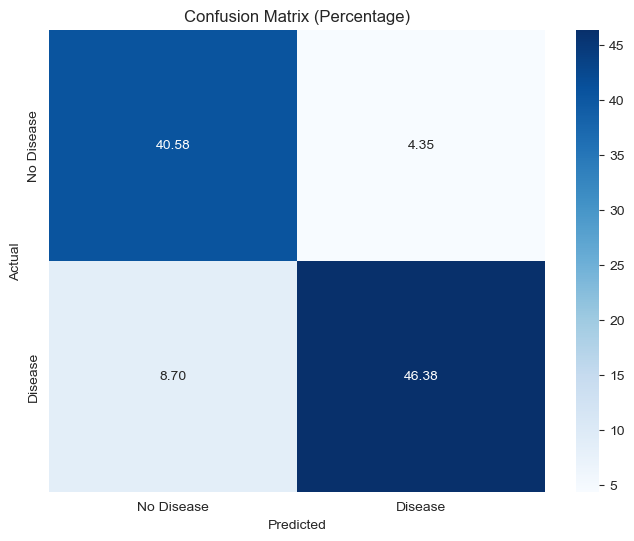

In [98]:
conf_matrix = confusion_matrix(y_test,pred_test)

conf_matrix_percentage = conf_matrix.astype('int') / conf_matrix.sum() * 100

plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_percentage,
    annot=True, 
    fmt=".2f", 
    cmap='Blues',
    xticklabels=['No Disease', 'Disease'],
    yticklabels=['No Disease', 'Disease']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentage)')
plt.show()

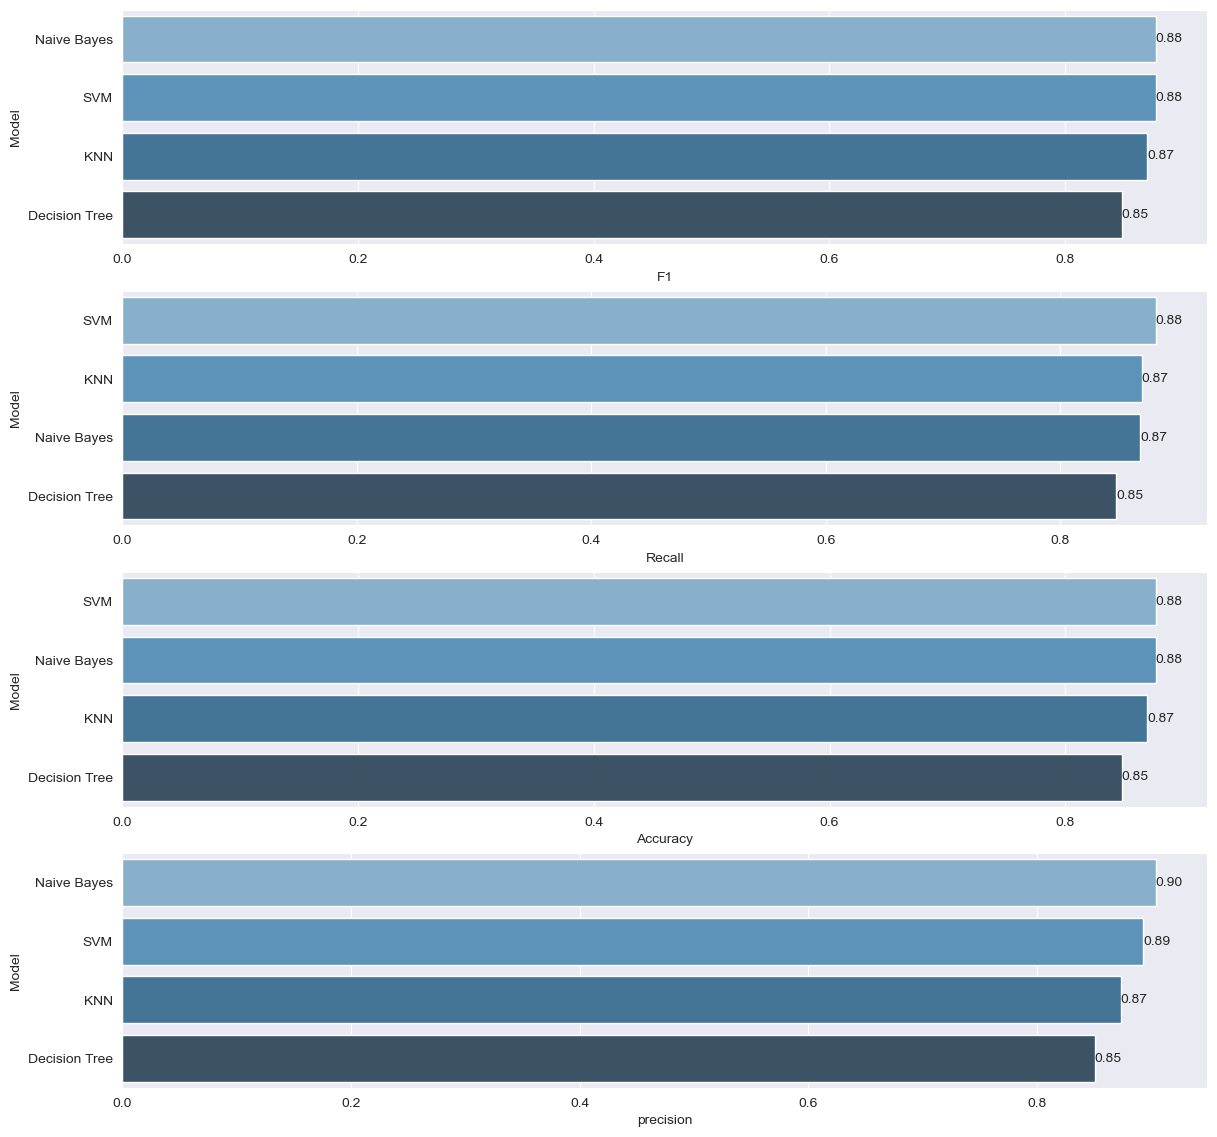

In [99]:
compare = pd.DataFrame({"Model": ["Naive Bayes","SVM", "KNN", "Decision Tree"],
                        "F1": [nb_f1, svm_f1, KNN_f1, DT_f1],
                        "Recall": [nb_recall,svm_recall,KNN_recall,DT_recall],
                        "Accuracy": [nb_accuracy,svm_accuracy,KNN_accuracy,DT_accuracy],
                        "precision":[nb_precision,svm_precision,KNN_precision,DT_precision],})
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')  
plt.figure(figsize=(14,14))
plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="precision", ascending=False)
ax=sns.barplot(x="precision", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show()

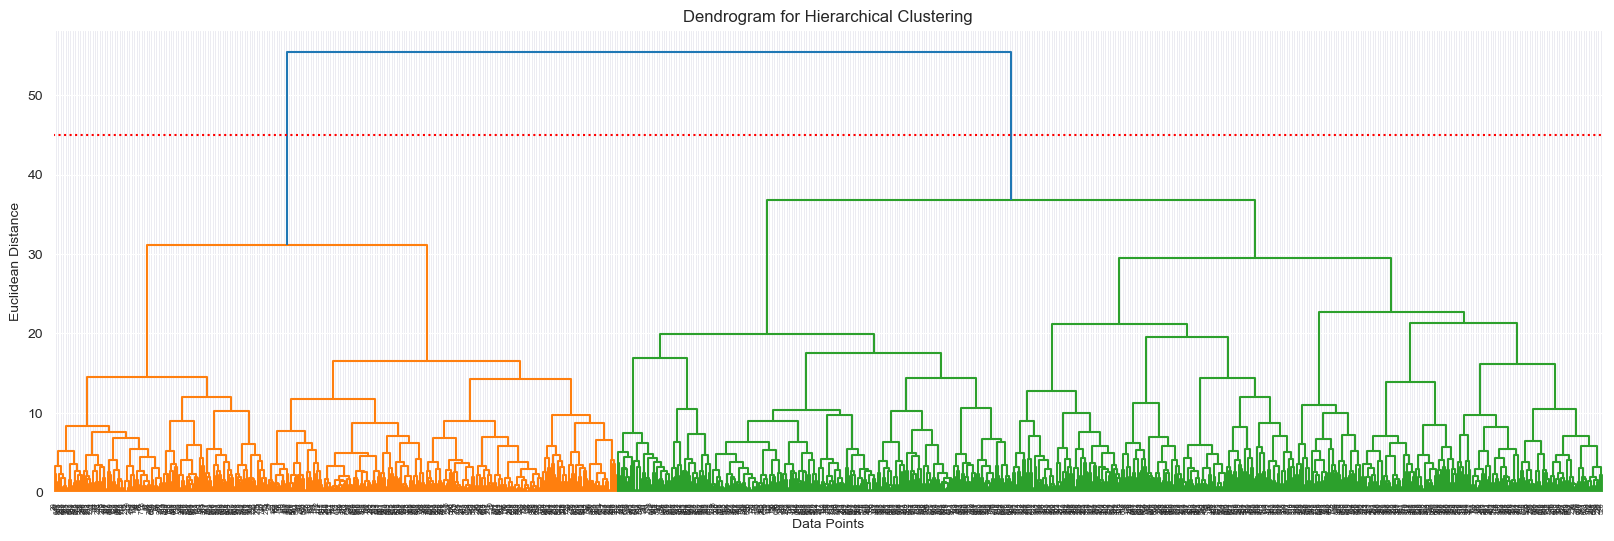

In [100]:
linkage_dendo=linkage(X_scaled, method='ward', metric='euclidean')
plt.figure(figsize=(20, 6))
dendrogram(linkage_dendo,truncate_mode="level")
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.axhline(y=45,color='r',linestyle='dotted')
plt.show()

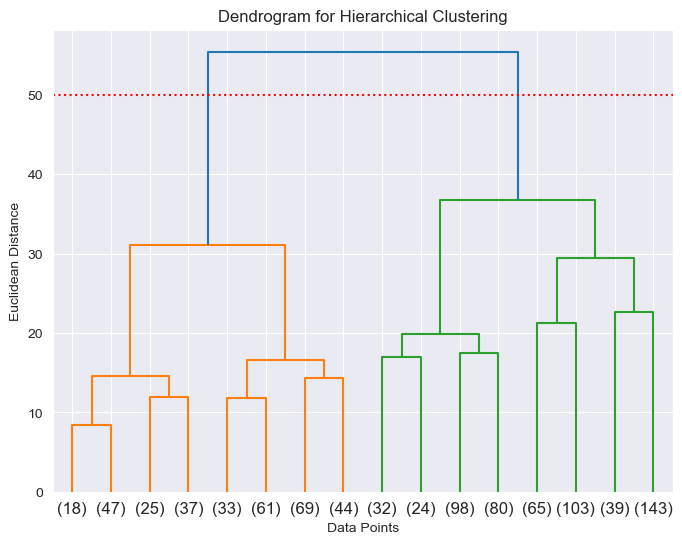

In [101]:
plt.figure(figsize=(8, 6))
dendrogram(linkage_dendo,truncate_mode="level",p=3)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.axhline(y=50,color='r',linestyle='dotted')
plt.show()

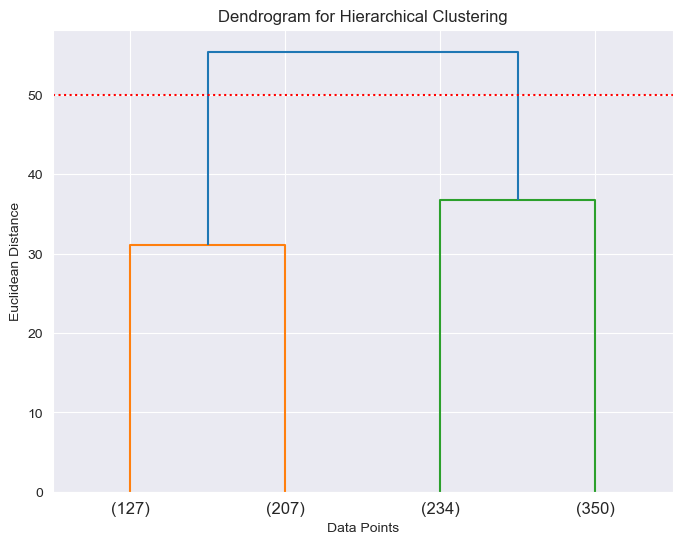

In [102]:
plt.figure(figsize=(8, 6))
dendrogram(linkage_dendo,truncate_mode="level",p=1)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.axhline(y=50,color='r',linestyle='dotted')
plt.show()

In [104]:
max_d = 45  
clusters = fcluster(linkage_dendo, max_d, criterion='distance')  # Assign cluster labels based on distance
print("Cluster assignments:",clusters)



Cluster assignments: [1 1 1 2 1 1 1 1 2 1 1 2 1 2 1 1 2 1 2 2 1 2 1 2 1 1 2 2 1 1 1 1 2 1 1 1 2
 1 2 2 1 2 1 1 2 2 1 1 1 2 2 2 2 1 2 1 2 1 1 2 1 1 1 2 1 1 1 1 2 1 2 1 2 1
 2 1 2 1 2 2 1 1 2 1 2 2 2 2 1 2 1 1 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 1 1 1
 2 2 1 1 1 2 2 1 1 2 1 1 2 1 2 1 1 2 1 1 2 2 2 2 1 1 1 2 2 2 2 2 1 1 1 1 1
 1 2 1 2 1 1 1 2 2 1 2 1 2 2 1 1 1 2 2 1 2 1 1 1 1 1 2 2 2 1 1 1 2 1 2 2 1
 2 2 2 2 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 2 1 2 1 2 2 2 1 1 2 1 2 1 1 1 2 2
 1 1 2 2 1 2 1 1 1 1 1 1 1 1 2 1 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 1 2 1 1 1 1
 1 1 1 2 2 2 1 2 1 2 1 1 1 2 1 1 1 2 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2

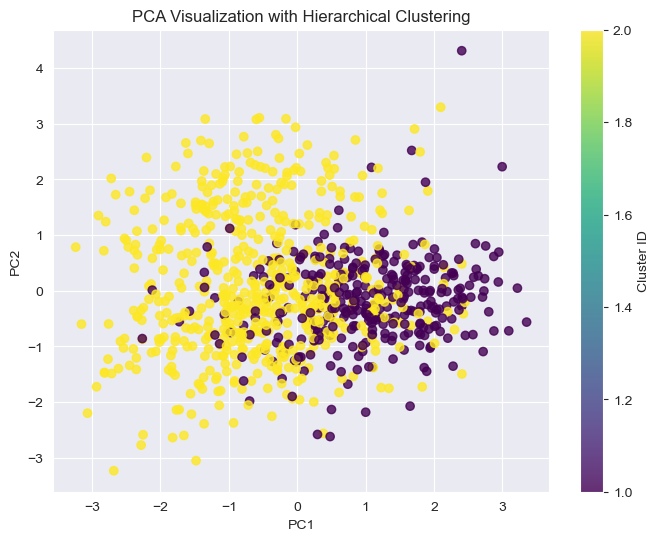

In [106]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.8)  # Color by hierarchical cluster
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization with Hierarchical Clustering')
plt.colorbar(label='Cluster ID')
plt.show()